<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Datascience-for-Economics-Final-Assignment" data-toc-modified-id="Datascience-for-Economics-Final-Assignment-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Datascience for Economics Final Assignment</a></span></li><li><span><a href="#Research-question-(0.5-points)" data-toc-modified-id="Research-question-(0.5-points)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Research question (0.5 points)</a></span></li><li><span><a href="#Motivation-(0.5-points)" data-toc-modified-id="Motivation-(0.5-points)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Motivation (0.5 points)</a></span></li><li><span><a href="#Method-and-data-(1.0-point)" data-toc-modified-id="Method-and-data-(1.0-point)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Method and data (1.0 point)</a></span></li><li><span><a href="#Preview-of-the-answers-(0.5-points)" data-toc-modified-id="Preview-of-the-answers-(0.5-points)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Preview of the answers (0.5 points)</a></span></li><li><span><a href="#Main-assumptions-(0.5-points)" data-toc-modified-id="Main-assumptions-(0.5-points)-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Main assumptions (0.5 points)</a></span></li><li><span><a href="#Python/R-code-(6-points)" data-toc-modified-id="Python/R-code-(6-points)-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Python/R code (6 points)</a></span></li><li><span><a href="#Robustness-analysis-(0.5-points)" data-toc-modified-id="Robustness-analysis-(0.5-points)-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Robustness analysis (0.5 points)</a></span></li><li><span><a href="#Discussion-and-conclusion-(0.5-points)" data-toc-modified-id="Discussion-and-conclusion-(0.5-points)-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Discussion and conclusion (0.5 points)</a></span></li></ul></div>

# Datascience for Economics Final Assignment

|Name|SNR|ANR|
|----|---|----|
|Caio Soares|2065131|u245285|
|Miquel Soler|2064021|u700978|


# Research question (0.5 points)

Cryptocurrencies have had a great impact on the world since the publication of Satoshi Nakamoto's whitepaper that established the protocol for bitcoin. Since then, several cryptocurrencies have been established, with a range of different characteristics. Among them, bitcoin has been by far the most important, having the largest market cap at 745,709,570,644 USD, number of owners at an estimated 100 million and volume of transactions at 10,658,251,003.85 USD.

In this assignment we will try to answer the following question:

* Can changes in bitcoin prices be reliably predicted?

# Motivation (0.5 points)

Due to the high volatility of the cryptocurrency, being able to predict the changes in prices would allow financial companies as well as individual users to greatly reduce the associated risks that come with cryptocurrency investments. It can also be used as a trading strategy.

# Method and data (1.0 point)

In order to answer this question we will attempt to accurately predict bitcoin prices through the use of an elastic net regression on bitcoin-market related variables,. We will then compare the predictions of the model with the actual prices to see how the model fares. The Elastic Net regression is a modified version of Ordinary Least Squares (OLS) regression as it incorporates rigde and lasso regressions. Both of these methods penalise an excessive number of explanatory variables, making it a good option to avoid overfitting in a context of a large number of predictors (which adds up to 730 in our model). Because it is essentially an OLS regression, our model heavily relies on correlation. However, a good performance of the model could very well indicate that it possesses good predictive capabilities.

The Lasso Regression works best when the model contains a lot of useless variables, it does so by automatically identifying and eliminating those variables that are not useful. Therefore, if we added the position of the stars as one of our variables in our bitcoin price predicting model, the Lasso Regression would eliminate it as it would be totally insignificant. Thus, thanks to Lasso we would end up with a simpler model which is easier to interpret.

Lasso Regression minimizes:

$$RSS+\lambda \sum\limits _{j\ =\ 1}^{p} |\ \beta _{j} |$$


Contrary to the Lasso Regression, the Ridge Regression works best when the model contains a lot of useful variables. In the case that our model contains many useful variables, the Ridge Regression will shrink the parameters by penalizing the size (square of the magnitude) of the regression coefficients, but will do so without eliminating any of them, therefore it minimizes the impact of irrelevant features.

Ridge Regression minimizes:

$$RSS+\lambda \sum\limits _{j\ =\ 1}^{p} \beta _{j}^{2}$$

However, with a dataset containing over 700 variables, we expect to have a vast amount of both useful and useless variables. Therefore, as we do not want to choose between Lasso Regression or Ridge Regression, we will use the Elastic Net Regression. 

The Elastic-Net Regression, just like in Lasso and Ridge, starts with a simple Ordinary Least Squares (OLS). Afterwards, it combines the Lasso Regression penalty with the Ridge Regression penalty. This allows the Elastic-Net regression to combine the strengths of both Lasso and Ridge, which makes it excel at dealing with correlated parameters.

Therefore, the Elastic-Net Regression will minimize:

$$RSS+\lambda _{1}\sum\limits _{j\ =\ 1}^{p} \beta _{j}^{2} +\lambda _{2}\sum\limits _{j\ =\ 1}^{p} |\ \beta _{j} |$$

where 𝜆1 and 𝜆2 correspond to the Lasso and Ridge tuning parameters respectively and the Residual Sum of Squares (RSS) is defined by: 

$$RSS=\sum\limits _{i\ =\ 1}^{n}\left( y_{i} -\beta _{0} -\sum\limits _{j\ =\ 1}^{p} \beta _{j} x_{ij}\right)^{2}$$

The dataset used is scrapped from the web from https://bitinfocharts.com/. We used the scrapping tool made available by Mudassir et al (2020) on their [github](https://github.com/heliphix/btc_data) to gather the data. An overview of the features from which the variables were created can be found on Table 1.

## Table 1

|Feature|Description|
|:----:|----|
|Transaction|The number of sent and received Bitcoin payments|
|Block Size|Transactional information cryptographically linked in the blockchain. The maximum block size is currently set at 1 megabyte|
|Sent from addresses|These are distinct Bitcoin addresses from which payments are made everyday|
|Difficulty|The daily average mining difficulty. The difficulty is computed by the network after a specified number of blocks have been created so that the  time it requires to mine a block remains around 10 min|
|Average transaction value|The average value of the transactions in Bitcoin|
|Mining profitability|The profitability in USD/day for 1 terahash per second (THash/s)|
|Sent BTC|The total Bitcoins sent daily|
|Fee-toreward ratio|The ratio of the fee sent in a transaction to the reward for verifying that transaction by the other users|
|Median Transaction Fee|The median of transaction fees in Bitcoin|
|Average Transaction Fee|Each transaction can have an associated transaction fee determined by the sender. The transaction fee is received by the miners who verify the transaction. Transactions with higher fees incentivize the Bitcoin miners to process them sooner than transactions with lower fees|
|Block time|The time required to mine one block. Usually, it is around 10 min but can fluctuate depending on the hashrate of the network|
|Hashrate|The daily total computational capacity of the Bitcoin network. Hashrate indicates the speed of a computer in completing an operation|
|Median transaction value|The median value of the transactions in Bitcoin|
|Active addresses|The number of unique addresses participating in a transaction by either sending or receiving Bitcoins|
|Top 100 to total|The ratio of Bitcoins stored in the top 100 accounts to all the other accounts of Bitcoin|


# Preview of the answers (0.5 points)

<img src="https://raw.githubusercontent.com/M-Soler/AEA_final_assignment/master/figure3.png"><br/>
<img src="https://raw.githubusercontent.com/M-Soler/AEA_final_assignment/master/figure7.png"><br/>
<img src="https://raw.githubusercontent.com/M-Soler/AEA_final_assignment/master/figure14.png"><br/>
<img src="https://raw.githubusercontent.com/M-Soler/AEA_final_assignment/master/figure30.png"><br/>
<img src="https://raw.githubusercontent.com/M-Soler/AEA_final_assignment/master/figure90.png">

# Python/R code (6 points)

First, we define the function that scrapes data. This code is from Mudassir et al (2020).

In [4]:
# Define function for data scrapping

from multiprocessing import Process, Queue
def get_dates(queue, start_date='2010/07/17', end_date='2023/01/07'):
	from bs4 import BeautifulSoup #module for web scraping install by pip install beautifulsoup4
	import requests #for requesting html. install by pip install requests
	from requests.adapters import HTTPAdapter
	from requests.packages.urllib3.util.retry import Retry
	import re #regular expression for data extraction by pattern matching. installed by default.
	import pandas as pd # for dataframe. install by pip install pandas
	from csv import reader #for list structure. installed by default.
	from tqdm import tqdm
	import os
	import shutil
	import uuid
	import time
	
	start_date = start_date
	end_date = end_date
	
	dir = str(uuid.uuid4())
	if os.path.exists(dir):
	    shutil.rmtree(dir)
	os.makedirs(dir)
	features=pd.DataFrame({'features':['transactions','size','sentbyaddress','difficulty','hashrate','mining_profitability','sentinusd','transactionfees','median_transaction_fee','confirmationtime','transactionvalue','mediantransactionvalue','activeaddresses','top100cap','fee_to_reward','price']})
	indicators=pd.DataFrame({'indicators':['sma','ema','wma','trx','mom','std','var','rsi','roc']})
	periods=pd.DataFrame({'periods':['3','7','14','30','90']})
	crypto=pd.DataFrame({'crypto':['btc']})
	df=pd.concat([crypto, features,indicators,periods], axis=1)

	#for raw values
	#all kinds of fees and transaction values are in USD. divide by price USD to obtain BTC
	url_list=[] #stores generated urls
	feature_list=[] #store feature names
	i=0
	while (i<=15): #this loop generates urls for raw values
		url='https://bitinfocharts.com/comparison/'+df['features'][i]+'-'+'btc'+'.html'
		feature = df['features'][i]
		if "fee" in feature:
			feature=df['features'][i]+'USD'
		if 'value' in feature:
			feature=df['features'][i]+'USD'
		if 'usd' in feature:
			feature=df['features'][i]+'USD'
		url_list.append(url)
		feature_list.append(feature)
		i=i+1
	#for indicators
	#all kinds of fees and transaction values are in USD. drop them or recalculate them after converting the raw values to the BTC
	i=0
	while (i<=15): #this nested while loop generates url structure for all the indicators. for other currencies change btc to CURRENCY_NAME
		j=0
		while (j<=8):
			k=0
			while (k<=4):
				url='https://bitinfocharts.com/comparison/'+df['features'][i]+'-'+'btc'+'-'+df['indicators'][j]+df['periods'][k]+'.html'
				feature=df['features'][i]+df['periods'][k]+df['indicators'][j]
				if "fee" in feature:
					feature=df['features'][i]+df['periods'][k]+df['indicators'][j]+'USD'
				if 'value' in feature:
					feature=df['features'][i]+df['periods'][k]+df['indicators'][j]+'USD'
				if 'price' in feature:
					feature=df['features'][i]+df['periods'][k]+df['indicators'][j]+'USD'
				if 'usd' in feature:
					feature=df['features'][i]+df['periods'][k]+df['indicators'][j]+'USD'
				if 'fee_in_reward' in feature:
					feature=df['features'][i]+df['periods'][k]+df['indicators'][j]
				url_list.append(url)
				feature_list.append(feature)
				#print(feature,' ',url)
				k=k+1
			j=j+1
		i=i+1
	


	df_feature=pd.DataFrame(feature_list,columns=['Features']) # convert feature list to dataframe
	df_url=pd.DataFrame(url_list,columns=['URL']) # convert url list to dataframe

	df2=df_feature.join(df_url) # join the feature and url dataframes 
	
	features=pd.DataFrame(columns=df2.Features) #change the feature list to columns

	columns=len(features.columns) #to be used in while loop for getting data
	columns

	date=[] #create a date column for each feature. this is necessary for aligning by dates later
	print('Building URLs ...')	
	for i in tqdm(range(len(features.columns))):
	    date=features.columns[i] + 'Date'
	    features[date]=date

	i=0
	print('Requesting data ... ')
	for i in tqdm(range(columns)): #the most important. getting the data from the website. DONT ABUSE IT. you might be IP banned for requesting a lot
		columnNames=[features.columns[i+columns],features.columns[i]]
		url = df2.URL[i]
		session = requests.Session()
		retry = Retry(connect=10, backoff_factor=3)
		adapter = HTTPAdapter(max_retries=retry)
		session.mount('http://', adapter)
		session.mount('https://', adapter)
		page=session.get(url)
		soup = BeautifulSoup(page.content, 'html.parser')
		values=soup.find_all('script')[4].get_text()
		newval=values.replace('[new Date("','')
		newval2=newval.replace('"),',";")
		newval3=newval2.replace('],',',')
		newval4=newval3.replace('],',']]')
		newval5=newval4.replace('null','0')
		x = re.findall('\\[(.+?)\\]\\]', newval5)
		df3=pd.DataFrame( list(reader(x)))
		df_transposed=df3.transpose()
		df_transposed.columns=['Value']
		df_new=df_transposed['Value'].str.split(';', 1, expand=True)
		df_new.columns= columnNames
		mask = (df_new[features.columns[i+columns]] >= start_date) & (df_new[features.columns[i+columns]] <= end_date)
		df_new= df_new.loc[mask]
		features[features.columns[i]] = df_new[features.columns[i]]
		features[features.columns[i+columns]]= df_new[features.columns[i+columns]]
		df_new.columns = df_new.columns.str.replace('.*Date*', 'Date')
		path=dir+'/'+features.columns[i]+'.csv'
		df_new.set_index('Date', inplace=True)
		df_new.to_csv(path,sep=',', columns=[features.columns[i]])
		#print(df_new)
		#i = i+1

	i=0
	pricepath=dir+'/'+'price.csv'
	df_merge=pd.read_csv(pricepath,sep=',')
	print('Processing files ... ')
	for i in tqdm(range(columns)):
		path=dir+'/'+features.columns[i]+'.csv'
		df=pd.read_csv(path,sep=',')
		df_merge = pd.merge(df_merge, df, left_on='Date', right_on='Date')
		#i = i+1
	
	df_merge.drop(columns=['price_y'], inplace=True)
	df_merge.columns = df_merge.columns.str.replace('price_x', 'priceUSD')

	df_merge
	
	path2=dir+'/'+'Merged_Unconverted_BTC_Data.csv'
	df_merge.to_csv(path2,sep=',')
	df_all = pd.read_csv(path2,sep = ',')
	df_all.columns

	df_all.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

	df_all['priceUSD']=df_merge['priceUSD']
	df_all
	
	filename=dir+'_'+'BTC_Data.csv'
	df_all.to_csv(filename,sep=',')
	
	queue.put(df_all)
 
def get_data(start_date='2010/07/17', end_date='2023/01/07'):
	'''
	def get_data(start_date, end_date):
		...
		return df
	Note: date format in YYYY/MM/DD	
	
	Example:
	from datacollector import get_data
	df=get_data('2020/01/01','2020/01/07')
	'''
	q = Queue()
	p = Process(target=get_dates, args=(q, start_date, end_date))
	p.start()
	df=q.get()
	p.join()
	return df

if __name__ == '__main__':
	get_data()

Building URLs ...


100%|██████████| 736/736 [00:00<00:00, 2105.24it/s]


Requesting data ... 


100%|██████████| 736/736 [10:45<00:00,  1.14it/s]


Processing files ... 


100%|██████████| 736/736 [00:52<00:00, 14.06it/s]


We then select our desired time span. We selected the start date as 01/08/2012 since we were concerned over some extreme outliers which obviouly mistakes on the data as they were 46 degress of magnitude larger than the other values of the same variable. We believe that these outliers caused a high MAE on our first estimation, and decided to exclude them. As we will look into 90 day changes in some variables, we eliminated the following 3 months after the extreme value. All of the extremem values were in the beggining of the sample: 2012 or earlier.

In [18]:
dataframe = get_data('2012/08/01','2020/01/31')

Building URLs ...


100%|██████████| 736/736 [00:00<00:00, 2051.55it/s]


Requesting data ... 


100%|██████████| 736/736 [10:43<00:00,  1.14it/s]


Processing files ... 


100%|██████████| 736/736 [00:52<00:00, 14.02it/s]


These are the packages that will be used going forward:

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

We then generate the dataframes we will run our model on. First, we scale all variables so that they range from 0 to 1, as following:

$$x'=\frac{x-min(x)}{max(x)-min(x)}$$

We then include the variables we want to predict on a separate dataframe (y_variables) and divide our sample into training and validation data (80% and 20%, respectively). Our variables of interest are the change in bitcoin prices in 3, 7, 14, 30 and 90 days. We use earliest 80% of observations in training and the latest 20% in validation.

In [20]:
# Data cleaning

dates = dataframe.iloc[:,0]

plot_dates = dataframe.iloc[2193:,0]
plot_dates = pd.to_datetime(plot_dates, format = '%Y/%m/%d')

dataframe = dataframe.iloc[:,1:737] # drop date column

y_variables = dataframe.iloc[:,731:737]

# create new df for variables of interest

y_variables = dataframe.iloc[:,731:737]

# Feature scalling

for i in range(0,736):
    dataframe.iloc[:,i] = (dataframe.iloc[:,i]-dataframe.iloc[:,i].min())/(dataframe.iloc[:,i].max()-dataframe.iloc[:,i].min())

# Regression dataframes

row80thperc = round(len(dataframe)*0.8) # We will use 80% of the data to generate the model and the other 20% for validation

reg90 = dataframe.copy()
reg90 = reg90.iloc[:,0:731]
reg90.insert(0,'y',y_variables.iloc[:,4])

test_reg90 = reg90.iloc[:row80thperc,:]
valid_reg90 = reg90.iloc[row80thperc+1:,:]

reg30 = dataframe.copy()
reg30 = reg30.iloc[:,0:731]
reg30.insert(0,'y',y_variables.iloc[:,3])

test_reg30 = reg30.iloc[:row80thperc,:]
valid_reg30 = reg30.iloc[row80thperc+1:,:]

reg14 = dataframe.copy()
reg14 = reg14.iloc[:,0:731]
reg14.insert(0,'y',y_variables.iloc[:,2])

test_reg14 = reg14.iloc[:row80thperc,:]
valid_reg14 = reg14.iloc[row80thperc+1:,:]

reg07 = dataframe.copy()
reg07 = reg07.iloc[:,0:731]
reg07.insert(0,'y',y_variables.iloc[:,1])

test_reg07 = reg07.iloc[:row80thperc,:]
valid_reg07 = reg07.iloc[row80thperc+1:,:]

reg03 = dataframe.copy()
reg03 = reg03.iloc[:,0:731]
reg03.insert(0,'y',y_variables.iloc[:,4])

test_reg03 = reg03.iloc[:row80thperc,:]
valid_reg03 = reg03.iloc[row80thperc+1:,:]


We then run our model for the desired day windows. For each block, we first run an Elastic Net regression with fixed *alpha* and *l1* parameters. In the `sklearn` package, *l1* is the weight of the lasso regression and 1 - *l1* the weight of rigde regression.
We then simulate a range of alpha and l1 values and determine the best pair, i.e., the one that generates the lowest Mean Average Error (MAE), i.e., the sum of the errors  . The formula of the MEA is:


$$MAE=\dfrac{\sum\limits {i\ =\ 1}^{n} |y{i} -x_{i} |}{n}$$


We then use the best *alpha* adn *l1* in an Elastic Net Model to predict prices on the validation set.

In [ ]:
# 3-day prediction

data = test_reg03.values
X, y = data[:,1:733], data[:,0]

# define model

model = ElasticNet(alpha=1, l1_ratio=1e-2)

# define model evaluation method

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model

scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# force scores to be positive

scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

row = valid_reg03.iloc[:,1:].values

model.fit(X, y)

yhat03 = model.predict(row)

# define grid

grid = dict()
grid['alpha'] = [1e-7,1e-6,1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio'] = np.arange(0, 1, 0.1)

# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# perform the search
results = search.fit(X, y)

# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

# Use best alpha and l1 for prediction

model = ElasticNet(alpha=results.best_params_['alpha'], l1_ratio=results.best_params_['l1_ratio'])

scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

row = valid_reg03.iloc[:,1:].values

model.fit(X, y)

yhat03 = model.predict(row)


Mean MAE: 0.058 (0.004)
MAE: -0.009
Config: {'alpha': 1e-05, 'l1_ratio': 0.1}
Mean MAE: 0.009 (0.001)


In [ ]:
# 7 day prediction

data = test_reg07.values
X, y = data[:,1:733], data[:,0]

# define model

model = ElasticNet(alpha=1, l1_ratio=1e-2)

# define model evaluation method

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model

scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# force scores to be positive

scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

row = valid_reg07.iloc[:,1:].values

model.fit(X, y)

yhat07 = model.predict(row)

# define grid

grid = dict()
grid['alpha'] = [1e-7,1e-6,1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio'] = np.arange(0, 1, 0.1)

# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# perform the search
results = search.fit(X, y)

# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

# Use best alpha and l1 for prediction

model = ElasticNet(alpha=results.best_params_['alpha'], l1_ratio=results.best_params_['l1_ratio'])

scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

row = valid_reg07.iloc[:,1:].values

model.fit(X, y)

yhat07 = model.predict(row)


Mean MAE: 0.058 (0.004)


In [ ]:
# 14 day prediction

data = test_reg14.values
X, y = data[:,1:733], data[:,0]

# define model

model = ElasticNet(alpha=1, l1_ratio=1e-2)

# define model evaluation method

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model

scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# force scores to be positive

scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

row = valid_reg14.iloc[:,1:].values

model.fit(X, y)

yhat14 = model.predict(row)

# define grid

grid = dict()
grid['alpha'] = [1e-7,1e-6,1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio'] = np.arange(0, 1, 0.1)

# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# perform the search
results = search.fit(X, y)

# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

# Use best alpha and l1 for prediction

model = ElasticNet(alpha=results.best_params_['alpha'], l1_ratio=results.best_params_['l1_ratio'])

scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

row = valid_reg14.iloc[:,1:].values

model.fit(X, y)

yhat14 = model.predict(row)


In [ ]:
# 30 day prediction

data = test_reg30.values
X, y = data[:,1:733], data[:,0]

# define model

model = ElasticNet(alpha=1, l1_ratio=1e-2)

# define model evaluation method

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model

scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# force scores to be positive

scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

row = valid_reg30.iloc[:,1:].values

model.fit(X, y)

yhat30 = model.predict(row)

# define grid

grid = dict()
grid['alpha'] = [1e-7,1e-6,1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio'] = np.arange(0, 1, 0.1)

# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# perform the search
results = search.fit(X, y)

# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

# Use best alpha and l1 for prediction

model = ElasticNet(alpha=results.best_params_['alpha'], l1_ratio=results.best_params_['l1_ratio'])

scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

row = valid_reg30.iloc[:,1:].values

model.fit(X, y)

yhat30 = model.predict(row)


Mean MAE: 0.053 (0.004)
MAE: -0.007
Config: {'alpha': 1e-05, 'l1_ratio': 0.1}
Mean MAE: 0.007 (0.001)


In [ ]:
# 90 day prediction

data = test_reg90.values
X, y = data[:,1:733], data[:,0]

# define model

model = ElasticNet(alpha=1, l1_ratio=1e-2)

# define model evaluation method

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model

scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# force scores to be positive

scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

row = valid_reg90.iloc[:,1:].values

model.fit(X, y)

yhat90 = model.predict(row)

# define grid

grid = dict()
grid['alpha'] = [1e-7,1e-6,1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio'] = np.arange(0, 1, 0.1)

# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# perform the search
results = search.fit(X, y)

# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

# Use best alpha and l1 for prediction

model = ElasticNet(alpha=results.best_params_['alpha'], l1_ratio=results.best_params_['l1_ratio'])

scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

row = valid_reg90.iloc[:,1:].values

model.fit(X, y)

yhat90 = model.predict(row)


Mean MAE: 0.058 (0.004)
MAE: -0.009
Config: {'alpha': 1e-05, 'l1_ratio': 0.1}
Mean MAE: 0.009 (0.001)


## Results

For sake of simplicity, as the code that generates these results takes time to run, we will import the predicted values as csv files.

In [19]:
# import output of models

yhat03 = pd.read_csv('https://raw.githubusercontent.com/CaioVezzaSoares/Data-Science/main/yhat03.csv',names=['yhat03'])
yhat07 = pd.read_csv('https://raw.githubusercontent.com/CaioVezzaSoares/Data-Science/main/yhat07.csv',names=['yhat07'])
yhat14 = pd.read_csv('https://raw.githubusercontent.com/CaioVezzaSoares/Data-Science/main/yhat14.csv',names=['yhat14'])
yhat30 = pd.read_csv('https://raw.githubusercontent.com/CaioVezzaSoares/Data-Science/main/yhat30.csv',names=['yhat30'])
yhat90 = pd.read_csv('https://raw.githubusercontent.com/CaioVezzaSoares/Data-Science/main/yhat90.csv',names=['yhat90'])

The following plots show the predicted changes in bitcoin price against the actual price changes, for different intervals. Values are in percentages (12.25 represents a 12.25% change in price)*italicized text*

The assumptions for the accuracy of the model are the ones from OLS as the Elastic-Net Regression starts of with OLS as its base foundation:

* Linear relationship;
* There are more observations (*n*) than features (*p*) ( *n* > *p* );
* No or little multicollinearity.

### 3-day

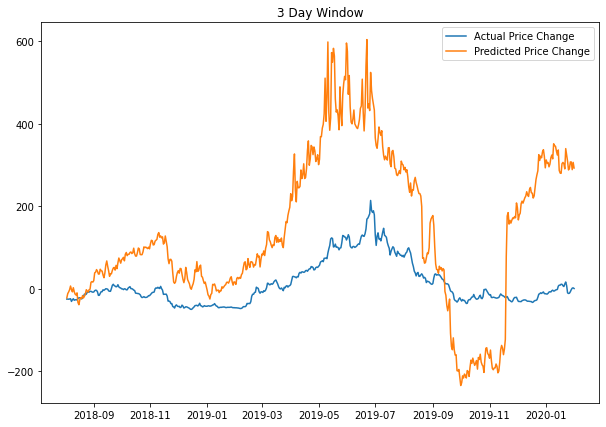

In [23]:
plot03 = pd.DataFrame()

plot03['Actual Price Change'] = valid_reg03['y']
plot03.reset_index(inplace=True)
plot03['Predicted Price Change'] = yhat03

fig, ax = plt.subplots(figsize=(10,7))
ax.plot(plot_dates,plot03[['Actual Price Change','Predicted Price Change']])
plt.legend(['Actual Price Change','Predicted Price Change'])
plt.title('3 Day Window')
plt.show()

In [22]:
plot03['Actual Price Change'].corr(plot03['Predicted Price Change'])

0.749895536448681

### 7-day

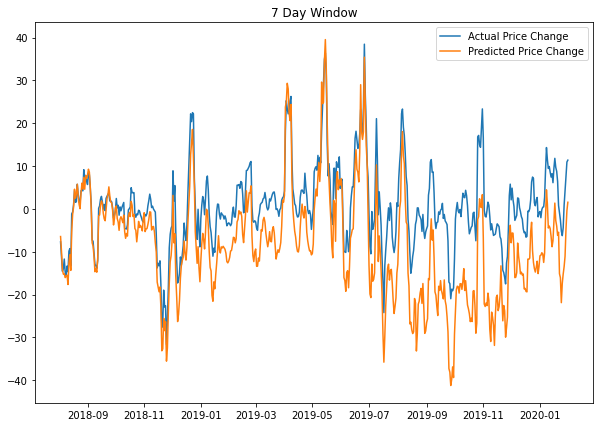

In [28]:
plot07 = pd.DataFrame()

plot07['Actual Price Change'] = valid_reg07['y']
plot07.reset_index(inplace=True)
plot07['Predicted Price Change'] = yhat07

fig, ax = plt.subplots(figsize=(10,7))
ax.plot(plot_dates,plot07[['Actual Price Change','Predicted Price Change']])
plt.legend(['Actual Price Change','Predicted Price Change'])
plt.title('7 Day Window')
plt.show()

In [29]:
plot07['Actual Price Change'].corr(plot07['Predicted Price Change'])

0.8538843592153137

### 14-day

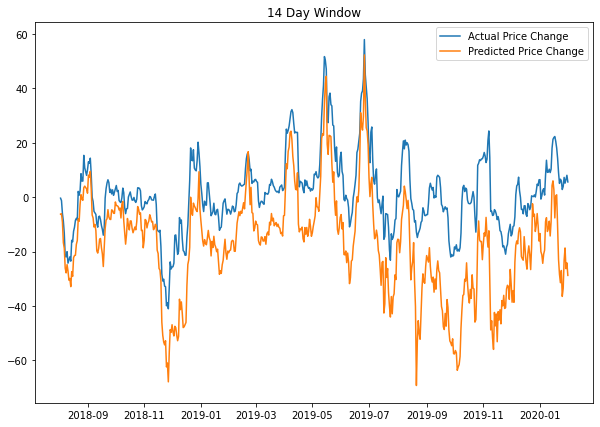

In [30]:
plot14 = pd.DataFrame()

plot14['Actual Price Change'] = valid_reg14['y']
plot14.reset_index(inplace=True)
plot14['Predicted Price Change'] = yhat14

fig, ax = plt.subplots(figsize=(10,7))
ax.plot(plot_dates,plot14[['Actual Price Change','Predicted Price Change']])
plt.legend(['Actual Price Change','Predicted Price Change'])
plt.title('14 Day Window')
plt.show()

In [31]:
plot14['Actual Price Change'].corr(plot14['Predicted Price Change'])

0.857681370642628

### 30-day

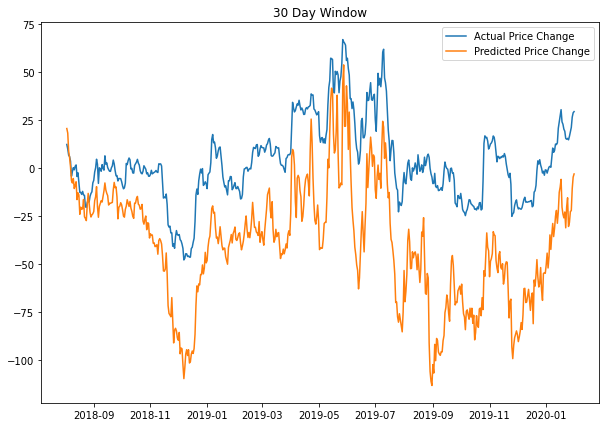

In [32]:
plot30 = pd.DataFrame()

plot30['Actual Price Change'] = valid_reg30['y']
plot30.reset_index(inplace=True)
plot30['Predicted Price Change'] = yhat30

fig, ax = plt.subplots(figsize=(10,7))
ax.plot(plot_dates,plot30[['Actual Price Change','Predicted Price Change']])
plt.legend(['Actual Price Change','Predicted Price Change'])
plt.title('30 Day Window')
plt.show()

In [33]:
plot30['Actual Price Change'].corr(plot30['Predicted Price Change'])

0.7930703416755691

### 90-day

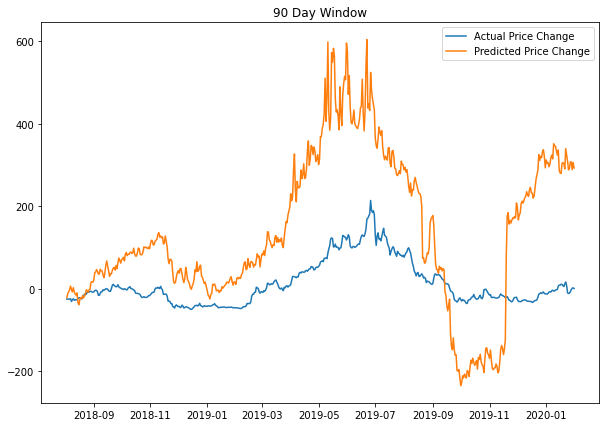

In [34]:
plot90 = pd.DataFrame()

plot90['Actual Price Change'] = valid_reg90['y']
plot90.reset_index(inplace=True)
plot90['Predicted Price Change'] = yhat90

fig, ax = plt.subplots(figsize=(10,7))
ax.plot(plot_dates,plot90[['Actual Price Change','Predicted Price Change']])
plt.legend(['Actual Price Change','Predicted Price Change'])
plt.title('90 Day Window')
plt.show()

In [3]:
plot90['Actual Price Change'].corr(plot90['Predicted Price Change'])

NameError: name 'plot90' is not defined

The high correlation coeficients (Table 2) indicate that the predicted and actual time series are similar.

### Table 2

|Window|Correlation Coefficient|
|----|---|
|3 day|0.7499|
|7 day|0.8539|
|14 day|0.8577|
|30 day|0.7931|
|90 day|0.7499|


The framework to evaluate how accurate the model is as follows. For each time window prediction, we create a column containing 1 if the prediction match the observed value and 0 otherwise. A match is defined as when two values are both positive or negative. The cummulative mean of the results is ploted below. 

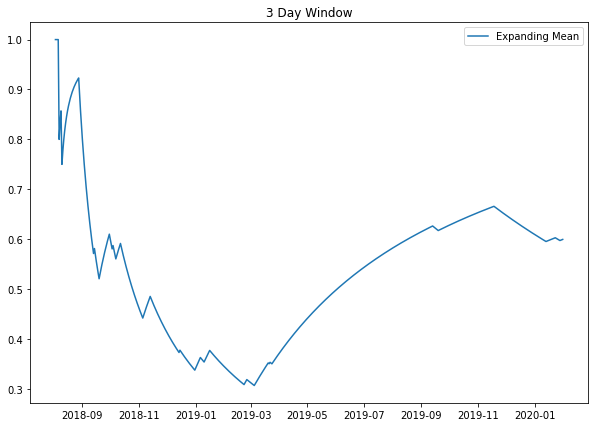

In [40]:
eval03 = plot03.copy()

a = []

for i in range(eval03.index.min(),eval03.index.max()+1):
    if eval03.loc[i,'Actual Price Change'] > 0 and eval03.loc[i,'Predicted Price Change'] > 0:
        a.append(1)
    elif eval03.loc[i,'Actual Price Change'] < 0 and eval03.loc[i,'Predicted Price Change'] < 0:
        a.append(1)
    else:
        a.append(0)

eval03['Result'] = a

eval03['Expanding Mean'] = eval03['Result'].expanding().mean()

fig, ax = plt.subplots(figsize=(10,7))
ax.plot(plot_dates,eval03['Expanding Mean'])
plt.legend(['Expanding Mean'])
plt.title('3 Day Window')
plt.show()

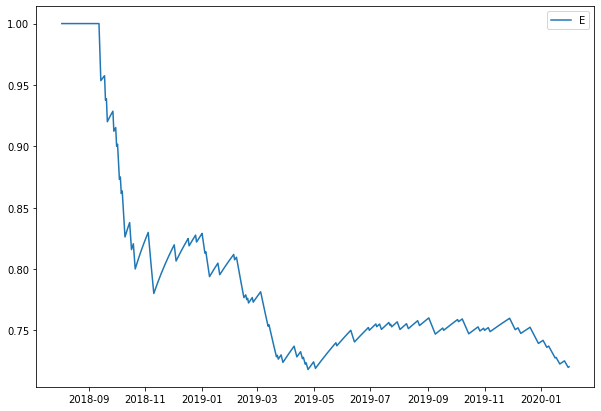

In [39]:
eval07 = plot07.copy()

a = []

for i in range(eval07.index.min(),eval07.index.max()+1):
    if eval07.loc[i,'Actual Price Change'] > 0 and eval07.loc[i,'Predicted Price Change'] > 0:
        a.append(1)
    elif eval07.loc[i,'Actual Price Change'] < 0 and eval07.loc[i,'Predicted Price Change'] < 0:
        a.append(1)
    else:
        a.append(0)

eval07['Result'] = a

eval07['Expanding Mean'] = eval07['Result'].expanding().mean()

fig, ax = plt.subplots(figsize=(10,7))
ax.plot(plot_dates,eval07['Expanding Mean'])
plt.legend(['Expanding Mean'])
plt.title('7 Day Window')
plt.show()


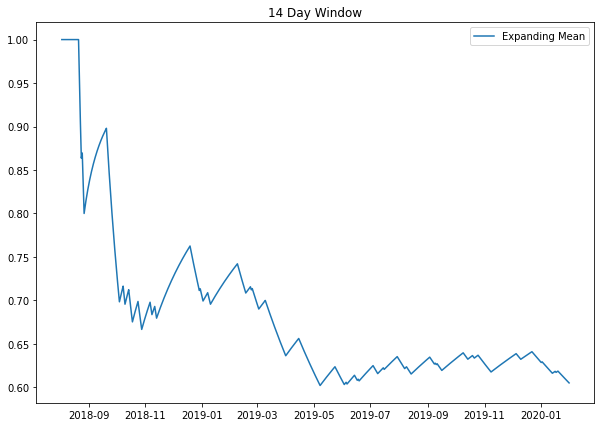

In [42]:
eval14 = plot14.copy()

a = []

for i in range(eval14.index.min(),eval14.index.max()+1):
    if eval14.loc[i,'Actual Price Change'] > 0 and eval14.loc[i,'Predicted Price Change'] > 0:
        a.append(1)
    elif eval14.loc[i,'Actual Price Change'] < 0 and eval14.loc[i,'Predicted Price Change'] < 0:
        a.append(1)
    else:
        a.append(0)

eval14['Result'] = a

eval14['Expanding Mean'] = eval14['Result'].expanding().mean()

fig, ax = plt.subplots(figsize=(10,7))
ax.plot(plot_dates,eval14['Expanding Mean'])
plt.legend(['Expanding Mean'])
plt.title('14 Day Window')
plt.show()


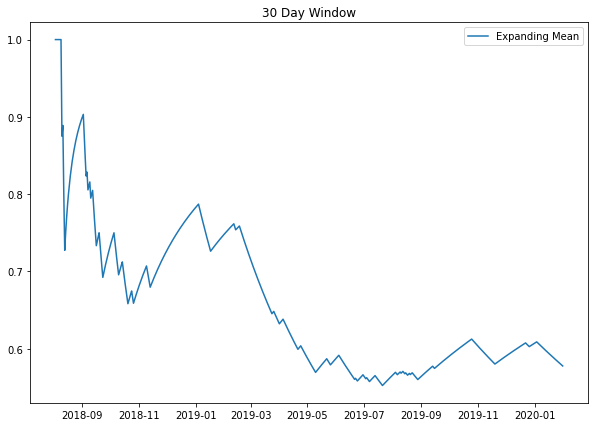

In [43]:
eval30 = plot30.copy()

a = []

for i in range(eval30.index.min(),eval30.index.max()+1):
    if eval30.loc[i,'Actual Price Change'] > 0 and eval30.loc[i,'Predicted Price Change'] > 0:
        a.append(1)
    elif eval30.loc[i,'Actual Price Change'] < 0 and eval30.loc[i,'Predicted Price Change'] < 0:
        a.append(1)
    else:
        a.append(0)

eval30['Result'] = a

eval30['Expanding Mean'] = eval30['Result'].expanding().mean()

fig, ax = plt.subplots(figsize=(10,7))
ax.plot(plot_dates,eval30['Expanding Mean'])
plt.legend(['Expanding Mean'])
plt.title('30 Day Window')
plt.show()


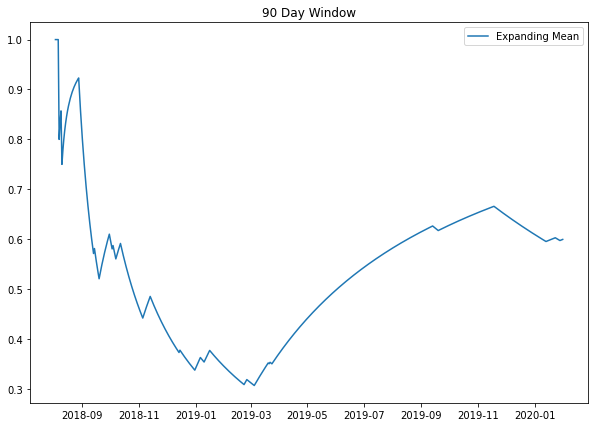

In [44]:
eval90 = plot90.copy()

a = []

for i in range(eval90.index.min(),eval90.index.max()+1):
    if eval90.loc[i,'Actual Price Change'] > 0 and eval90.loc[i,'Predicted Price Change'] > 0:
        a.append(1)
    elif eval90.loc[i,'Actual Price Change'] < 0 and eval90.loc[i,'Predicted Price Change'] < 0:
        a.append(1)
    else:
        a.append(0)

eval90['Result'] = a

eval90['Expanding Mean'] = eval90['Result'].expanding().mean()

fig, ax = plt.subplots(figsize=(10,7))
ax.plot(plot_dates,eval90['Expanding Mean'])
plt.legend(['Expanding Mean'])
plt.title('90 Day Window')
plt.show()


To assess whether the prediction is meaning we conduct a binomial test assuming a null hypothesis that our model is unable to perform better than randomly guessing if the price will go up or down with 50% accuracy. In laymans terms, we are checking if our predicting capabilities are significantly better than a coin toss.  The results are on Table 3.

In [54]:
n = len(eval03)*eval03.iloc[546,4] # number of successes

stats.binom_test(n,len(eval03),alternative='greater')

1.8085691030373863e-06

In [52]:
n = len(eval07)*eval07.iloc[546,4] # number of successes

stats.binom_test(n,len(eval07),alternative='greater')

8.378272014245527e-26

In [53]:
n = len(eval14)*eval14.iloc[546,4] # number of successes

stats.binom_test(n,len(eval14),alternative='greater')

5.004553958423136e-07

In [55]:
n = len(eval30)*eval30.iloc[546,4] # number of successes

stats.binom_test(n,len(eval30),alternative='greater')

0.00016024594872651648

In [56]:
n = len(eval90)*eval90.iloc[546,4] # number of successes

stats.binom_test(n,len(eval90),alternative='greater')

1.8085691030373863e-06

### Table 3

|Window|P Value of Binomial Test|
|----|---|
|3 day|1.8086e-06|
|7 day|8.3783e-26|
|14 day|5.0046e-07|
|30 day|0.0002|
|90 day|1.8086e-06|


# Discussion and conclusion (0.5 points)

Our model seems to provide a good prediction of price changes. The predicted time series are highly correlated with the actual prices. Also, we find that, using a binomial distribution, the probability that a model that randomly chooses increase or decrease in price would achieve our model's expanding mean is statistically indiscernible from 0. Therefore, we can be confident that our model's predictions are significantly better simply guessing by flipping a coin.

One thing to be cautious about these results is that any structural changes in the bitcoin market could severely reduce the model's predictive ability. For example, if a major unpredictable event drastically changes the characteristics of the bitcoin market, it would be expected that the model would fail to account for that, making its predictions less reliable.

# References

Mudassir, Mohammed, et al. "Time-series forecasting of Bitcoin prices using high-dimensional features: a machine learning approach." Neural Computing and Applications (2020): 1-15.

Nakamoto, Satoshi. Bitcoin: A peer-to-peer electronic cash system. Manubot, 2019.

https://bitinfocharts.com/

https://machinelearningmastery.com/elastic-net-regression-in-python/

https://uk.advfn.com/cryptocurrency
